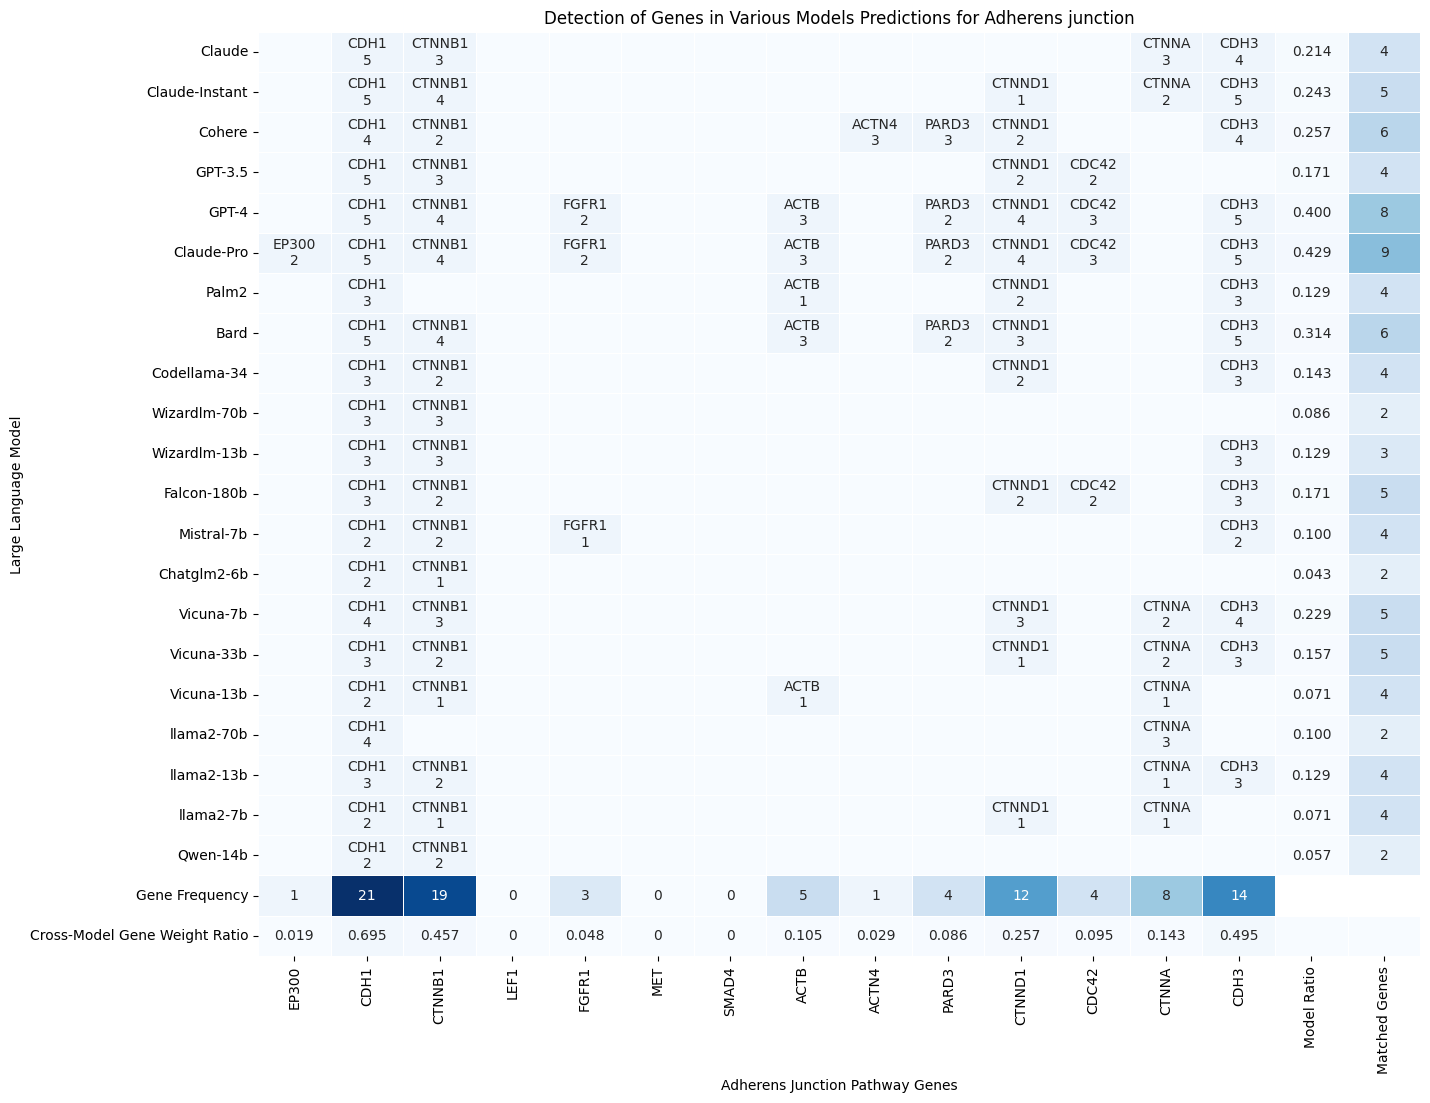

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given data
true_genes = list(set([
    'CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CDC42', 'CDH3', 'ACTN4', 'ACTB', 'EP300',
    'FGFR1', 'LEF1', 'PARD3', 'MET', 'LEF1', 'SMAD4'
]))

# Your models dictionary
models = {
   'Claude': ['CDH1', 'CTNNB1', 'CTNNA', 'CTDNND1', 'CDC', 'CDH3', 'ACTN1', 'ACT', 'PVRL1', 'MLLT4', 'LIMA1', 'PRKCA', 'MLLT4', 'VCL', 'DSP'],
    'Claude-Instant': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CDC', 'CDH3', 'ACTN', 'ACT', 'PLEKHA7', 'RHOA', 'LMO7', 'DSG1', 'RAC1', 'VCL', 'AFADIN'],
    'Cohere': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CD42', 'CDH3', 'ACTN4', 'ACB', 'EPHA2', 'FBLN1', 'LED1', 'PARD3', 'MYC', 'PLXNA2', 'SND1'],
    'GPT-3.5': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDC42', 'JUP', 'Rac1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN'],
    'GPT-4': ['CDH1', 'CTNNB1', 'CAV2', 'CTNND1', 'CDC42', 'CDH3', 'PAK1', 'ACTB', 'AMOT', 'FGFR1', 'RHOC', 'PARD3', 'PAK2', 'CAV1', 'IQGAP1'],
    'Claude-Pro': ['CDH1', 'CTNNB1', 'TJP1', 'CTNND1', 'CDC42', 'CDH3', 'ACTG1', 'ACTB', 'EP300', 'FGFR1', 'CREBBP', 'PARD3', 'AFDN', 'SRC', 'VCL'],
    'Palm2': ['CDH1', 'CTNN', 'CDH20', 'CTNND1', 'CDH25', 'CDH3', 'ACTG', 'ACTB', 'CTNN', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Bard': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'ACTN1', 'CDH3', 'F11R', 'ACTB', 'CDH24', 'TJP1', 'ZO', 'PARD3', 'JAM', 'PLXN', 'AF'],
    'Codellama-34': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDH7', 'CDH3', 'CTNN', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'CTNN', 'FBLN1', 'LED1'],
    'Wizardlm-70b': ['CDH1', 'CTNNB1', 'JUP', 'Rac1', 'ZO-2', 'JUP', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'ARVCF', 'ZO-2', 'Zo1'],
    'Wizardlm-13b': ['CDH1', 'CTNNB1', 'CTNNA1', 'Rac1', 'ZO-2', 'CDH3', 'Zo1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN'],
    'Falcon-180b': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDC42', 'CDH3', 'ITGB', 'MLLT4', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Mistral-7b': ['CDH1', 'CTNNB1', 'CDH1', 'Rac1', 'ZO-2', 'CDH3', 'AMOT', 'FGFR1', 'ZO-2', 'PLEKHA7', 'RHOA', 'LMO7', 'DSG1', 'RAC1', 'VCL'],
    'Chatglm2-6b': ['CDH1', 'CTNNB1', 'JUP', 'Rac1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'JUP', 'Rac1', 'ZO-2'],
    'Vicuna-7b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'Ra1', 'CDH3', 'ZO-2', 'CDH7', 'DH30', 'ZO-2', 'RHOA', 'VCL', 'PLXN', 'CTNN', 'LXN'],
    'Vicuna-33b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CD42', 'CDH3', 'ITGB', 'MLLT4', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Vicuna-13b': ['CDH1', 'CTNNB1', 'CTNNA', 'Rac1', 'ZO-2', 'JM', 'ARVCF', 'ACTB', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'ARVCF'],
    'llama2-70b': ['CDH1', 'CTNN1', 'CTNNA', 'CTND1', 'ZO-2', 'CD3', 'AMOT', 'ATB', 'RHOA', 'VCL', 'AFADIN', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA'],
    'llama2-13b': ['CDH1', 'CTNNB1', 'CTNNA', 'RVC', 'ITGB', 'CDH3', 'F1R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC', 'CDH3', 'ITGB'],
    'llama2-7b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'ZO-2', 'CD3', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC', 'PLXN', 'VC'],
    'Qwen-14b': ['CDH1', 'CTNNB1', 'ZO-2', 'ITGB', 'MLLT4', 'RHOA', 'VCL', 'AFADIN', 'JUP', 'Rac1', 'ZO-2', 'CDH30', 'CDH15', 'CDH25', 'RHO']
}

# Your weights_data dictionary
weights_data = {
     "Claude": [5, 3, 3, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Claude-Instant": [5, 4, 2, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Cohere": [4, 2, 0, 2, 0, 4, 3, 0, 0, 0, 0, 3, 0, 0, 0],
    "GPT-3.5": [5, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "GPT-4": [5, 4, 0, 4, 3, 5, 0, 3, 0, 2, 0, 2, 0, 0, 0],
    "Claude-Pro": [5, 4, 0, 4, 3, 5, 0, 3, 2, 2, 0, 2, 0, 0, 0],
    "Palm2": [3, 0, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Bard": [5, 4, 0, 3, 0, 5, 0, 3, 0, 0, 0, 2, 0, 0, 0],
    "Codellama-34": [3, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Wizardlm-70b": [3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Wizardlm-13b": [3, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Falcon-180b": [3, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Mistral-7b": [2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Chatglm2-6b": [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-7b": [4, 3, 2, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-33b": [3, 2, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-13b": [2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "llama2-70b": [4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "llama2-13b": [3, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "llama2-7b": [2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Qwen-14b": [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
}

# Constants
total_genes = 14
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model Ratio'] = normalized_scores
annotation_df['Model Ratio'] = normalized_scores

annotation_df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)
df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched Genes", "Model Ratio"], axis=1).sum()
df.loc['Gene Frequency'] = gene_frequency
annotation_df.loc['Gene Frequency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross-Model Gene Weight Ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross-Model Gene Weight Ratio'] = df.loc['Cross-Model Gene Weight Ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = 0
annotation_df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s')

plt.title('Detection of Genes in Various Models Predictions for Adherens junction')
plt.xlabel('Adherens Junction Pathway Genes')
plt.ylabel('Large Language Model')

# Adjust the alignment of x-axis tick labels (gene names)
#plt.xticks(rotation=0.1, ha='Right')  # Rotate the gene names upwards and align them to the right

plt.xticks(rotation=90, ha='center')  # Rotate the gene names vertically

plt.show()


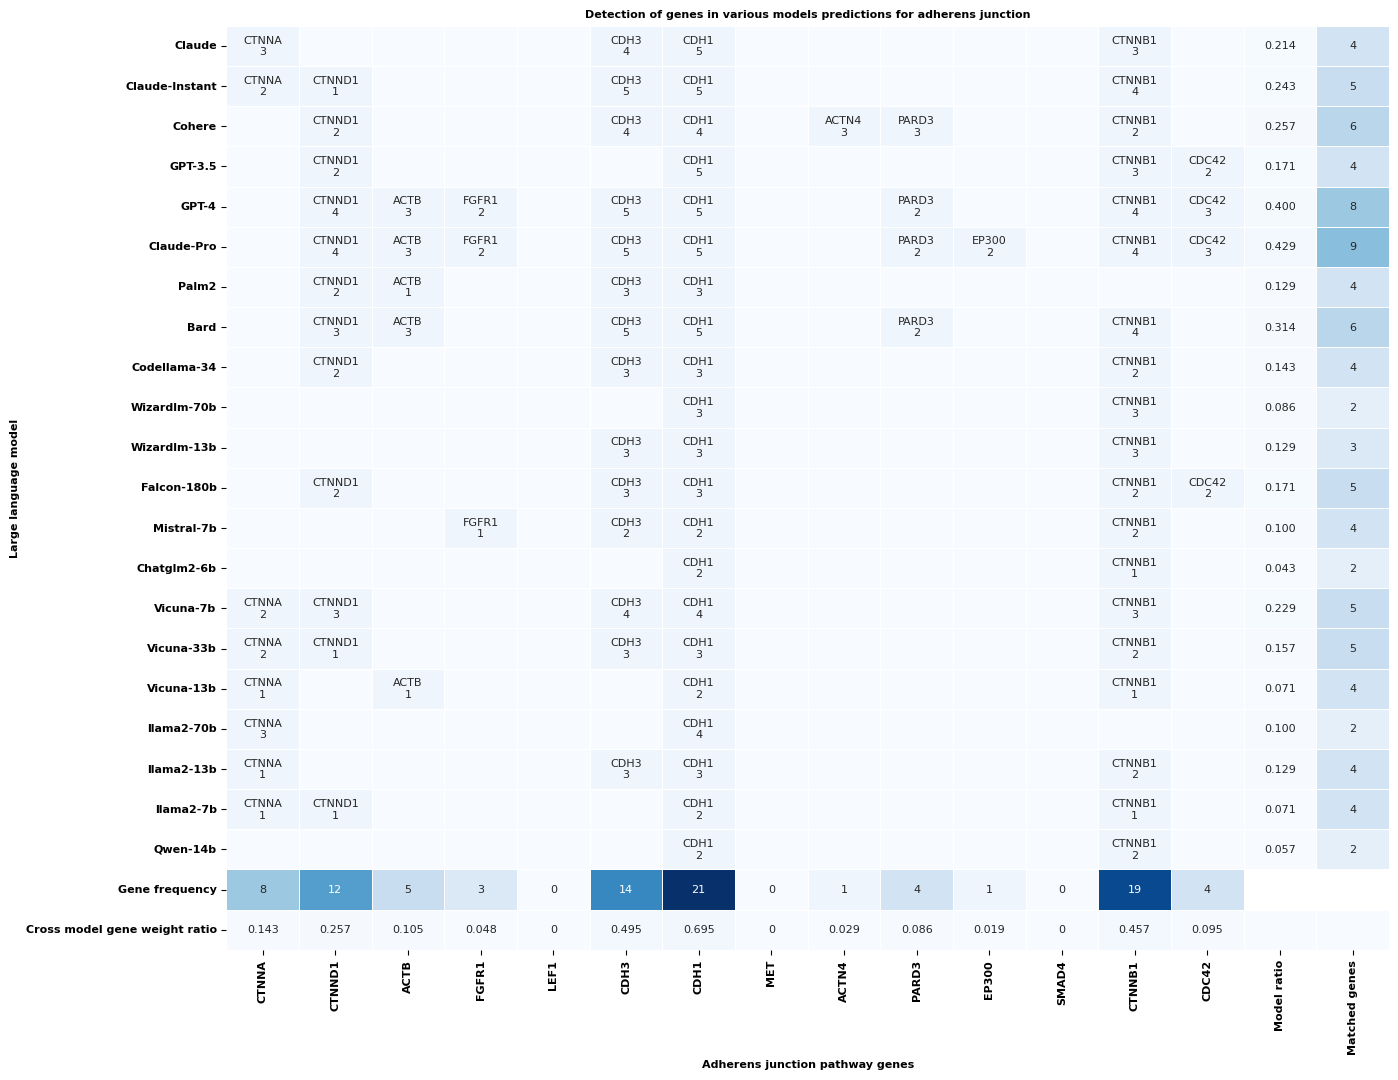

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Given data
true_genes = list(set([
    'CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CDC42', 'CDH3', 'ACTN4', 'ACTB', 'EP300',
    'FGFR1', 'LEF1', 'PARD3', 'MET', 'LEF1', 'SMAD4'
]))

# Your models dictionary
models = {
    'Claude': ['CDH1', 'CTNNB1', 'CTNNA', 'CTDNND1', 'CDC', 'CDH3', 'ACTN1', 'ACT', 'PVRL1', 'MLLT4', 'LIMA1', 'PRKCA', 'MLLT4', 'VCL', 'DSP'],
    'Claude-Instant': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CDC', 'CDH3', 'ACTN', 'ACT', 'PLEKHA7', 'RHOA', 'LMO7', 'DSG1', 'RAC1', 'VCL', 'AFADIN'],
    'Cohere': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CD42', 'CDH3', 'ACTN4', 'ACB', 'EPHA2', 'FBLN1', 'LED1', 'PARD3', 'MYC', 'PLXNA2', 'SND1'],
    'GPT-3.5': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDC42', 'JUP', 'Rac1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN'],
    'GPT-4': ['CDH1', 'CTNNB1', 'CAV2', 'CTNND1', 'CDC42', 'CDH3', 'PAK1', 'ACTB', 'AMOT', 'FGFR1', 'RHOC', 'PARD3', 'PAK2', 'CAV1', 'IQGAP1'],
    'Claude-Pro': ['CDH1', 'CTNNB1', 'TJP1', 'CTNND1', 'CDC42', 'CDH3', 'ACTG1', 'ACTB', 'EP300', 'FGFR1', 'CREBBP', 'PARD3', 'AFDN', 'SRC', 'VCL'],
    'Palm2': ['CDH1', 'CTNN', 'CDH20', 'CTNND1', 'CDH25', 'CDH3', 'ACTG', 'ACTB', 'CTNN', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Bard': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'ACTN1', 'CDH3', 'F11R', 'ACTB', 'CDH24', 'TJP1', 'ZO', 'PARD3', 'JAM', 'PLXN', 'AF'],
    'Codellama-34': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDH7', 'CDH3', 'CTNN', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'CTNN', 'FBLN1', 'LED1'],
    'Wizardlm-70b': ['CDH1', 'CTNNB1', 'JUP', 'Rac1', 'ZO-2', 'JUP', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'ARVCF', 'ZO-2', 'Zo1'],
    'Wizardlm-13b': ['CDH1', 'CTNNB1', 'CTNNA1', 'Rac1', 'ZO-2', 'CDH3', 'Zo1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN'],
    'Falcon-180b': ['CDH1', 'CTNNB1', 'CTNNA1', 'CTNND1', 'CDC42', 'CDH3', 'ITGB', 'MLLT4', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Mistral-7b': ['CDH1', 'CTNNB1', 'CDH1', 'Rac1', 'ZO-2', 'CDH3', 'AMOT', 'FGFR1', 'ZO-2', 'PLEKHA7', 'RHOA', 'LMO7', 'DSG1', 'RAC1', 'VCL'],
    'Chatglm2-6b': ['CDH1', 'CTNNB1', 'JUP', 'Rac1', 'ZO-2', 'JAM', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'JUP', 'Rac1', 'ZO-2'],
    'Vicuna-7b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'Ra1', 'CDH3', 'ZO-2', 'CDH7', 'DH30', 'ZO-2', 'RHOA', 'VCL', 'PLXN', 'CTNN', 'LXN'],
    'Vicuna-33b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'CD42', 'CDH3', 'ITGB', 'MLLT4', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC'],
    'Vicuna-13b': ['CDH1', 'CTNNB1', 'CTNNA', 'Rac1', 'ZO-2', 'JM', 'ARVCF', 'ACTB', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA', 'VCL', 'AFADIN', 'ARVCF'],
    'llama2-70b': ['CDH1', 'CTNN1', 'CTNNA', 'CTND1', 'ZO-2', 'CD3', 'AMOT', 'ATB', 'RHOA', 'VCL', 'AFADIN', 'ARVCF', 'ZO-2', 'Zo1', 'RHOA'],
    'llama2-13b': ['CDH1', 'CTNNB1', 'CTNNA', 'RVC', 'ITGB', 'CDH3', 'F1R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC', 'CDH3', 'ITGB'],
    'llama2-7b': ['CDH1', 'CTNNB1', 'CTNNA', 'CTNND1', 'ZO-2', 'CD3', 'F11R', 'CDH30', 'CDH15', 'CDH25', 'RHO', 'PLXN', 'VC', 'PLXN', 'VC'],
    'Qwen-14b': ['CDH1', 'CTNNB1', 'ZO-2', 'ITGB', 'MLLT4', 'RHOA', 'VCL', 'AFADIN', 'JUP', 'Rac1', 'ZO-2', 'CDH30', 'CDH15', 'CDH25', 'RHO']
}

# Your weights_data dictionary
weights_data = {
    "Claude": [5, 3, 3, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Claude-Instant": [5, 4, 2, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Cohere": [4, 2, 0, 2, 0, 4, 3, 0, 0, 0, 0, 3, 0, 0, 0],
    "GPT-3.5": [5, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "GPT-4": [5, 4, 0, 4, 3, 5, 0, 3, 0, 2, 0, 2, 0, 0, 0],
    "Claude-Pro": [5, 4, 0, 4, 3, 5, 0, 3, 2, 2, 0, 2, 0, 0, 0],
    "Palm2": [3, 0, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Bard": [5, 4, 0, 3, 0, 5, 0, 3, 0, 0, 0, 2, 0, 0, 0],
    "Codellama-34": [3, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Wizardlm-70b": [3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Wizardlm-13b": [3, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Falcon-180b": [3, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Mistral-7b": [2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Chatglm2-6b": [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-7b": [4, 3, 2, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-33b": [3, 2, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-13b": [2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "llama2-70b": [4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "llama2-13b": [3, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "llama2-7b": [2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Qwen-14b": [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
}

# Constants
total_genes = 14
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model ratio'] = normalized_scores
annotation_df['Model ratio'] = normalized_scores

annotation_df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)
df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched genes", "Model ratio"], axis=1).sum()
df.loc['Gene frequency'] = gene_frequency
annotation_df.loc['Gene requency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross model gene weight ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross model gene weight ratio'] = df.loc['Cross model gene weight ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = 0
annotation_df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s', annot_kws={"fontsize": 8, "fontname": "DejaVu Sans"})

plt.title('Detection of genes in various models predictions for adherens junction', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.xlabel('Adherens junction pathway genes', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.ylabel('Large language model', fontsize=8, fontname='DejaVu Sans', weight='bold')

# Adjust the alignment of x-axis tick labels (gene names)
plt.xticks(rotation=90, ha='center', fontsize=8, fontname='DejaVu Sans', weight='bold')  # Rotate the gene names vertically
plt.yticks(fontsize=8, fontname='DejaVu Sans', weight='bold')

# Save the figure with specified resolution and color mode
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight', format='png')

plt.show()
